# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import networkx as nx
import os

# 02. Importing Data

In [2]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis'

In [3]:
df_txn = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_transactions.pkl'))

In [4]:
df_card = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_card.pkl'))

In [5]:
df_user = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_user.pkl'))

# 03. Exploratory Visual Analysis

### Transaction Data

In [6]:
# Check df_txn columns
df_txn.columns

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_date',
       'txn_time', 'txn_amount', 'txn_flag', 'txn_type', 'merchant_name',
       'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code',
       'MCC', 'errors?', 'is_fraud?'],
      dtype='object')

In [7]:
df_txn.head()

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
0,0,0,2002,9,1,2002-09-01,06:21:00,134.09,Purchase,Swipe Transaction,3527213246127876953,La Verne,CA,USA,91750,5300,False,No
1,0,0,2002,9,1,2002-09-01,06:42:00,38.48,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
2,0,0,2002,9,2,2002-09-02,06:22:00,120.34,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
3,0,0,2002,9,2,2002-09-02,17:45:00,128.95,Purchase,Swipe Transaction,3414527459579106770,Monterey Park,CA,USA,91754,5651,False,No
4,0,0,2002,9,3,2002-09-03,06:23:00,104.71,Purchase,Swipe Transaction,5817218446178736267,La Verne,CA,USA,91750,5912,False,No


In [8]:
# Create Transaction df sub with numerical columns for EVA
df_txn_sub = df_txn[['txn_year', 'txn_month', 'txn_day', 'txn_amount']]

In [9]:
# Check Data Types
df_txn_sub.dtypes

txn_year        int64
txn_month       int64
txn_day         int64
txn_amount    float64
dtype: object

In [10]:
# Check for missing values
df_txn_sub.isnull().sum()

txn_year      0
txn_month     0
txn_day       0
txn_amount    0
dtype: int64

In [11]:
# Find duplicates
df_txn_dups = df_txn_sub[df_txn_sub.duplicated()]

In [12]:
df_txn_dups.shape

(6391592, 4)

#### Exploring Numerical Relationships

In [13]:
# Create a correlation matrix using pandas
df_txn_sub.corr()

,txn_year,txn_month,txn_day,txn_amount
txn_year,1.000000,-0.055990,-0.001486,-0.011629
txn_month,-0.055990,1.000000,0.013521,-0.000628
txn_day,-0.001486,0.013521,1.000000,-0.000568
txn_amount,-0.011629,-0.000628,-0.000568,1.000000


There does not seem to be a correlation between transaction amount and the year, month, and day of the transaction. 

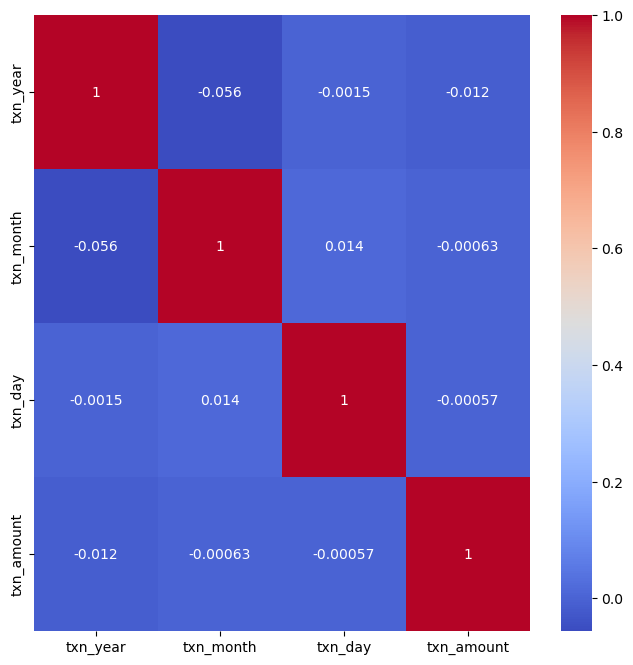

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_txn_sub.corr(), annot = True, cmap = 'coolwarm', ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Save heatmap
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\txn_corr_heatmap.png')

plt.show()


#### Scatter Plot

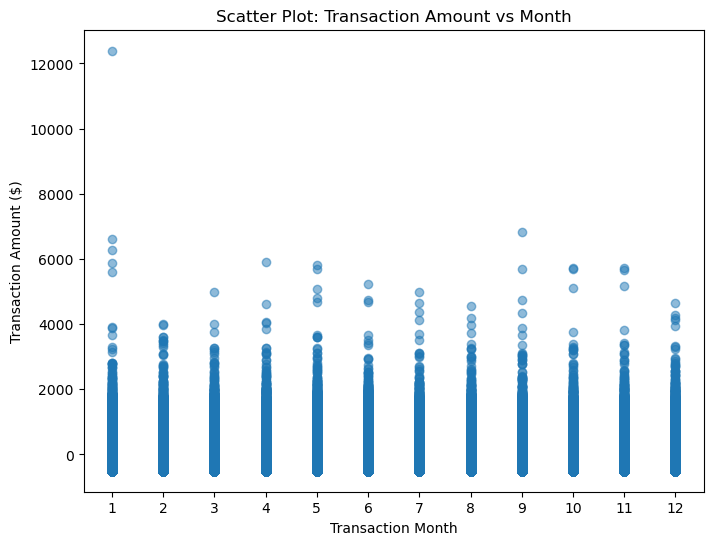

In [15]:
# Scatter Plot of Transaction Amount vs Month

plt.figure(figsize=(8,6))
plt.scatter(df_txn_sub['txn_month'], df_txn_sub['txn_amount'], alpha=0.5)
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Amount ($)')
plt.title('Scatter Plot: Transaction Amount vs Month')
plt.xticks(range(1,13))  # show months 1-12 on x-axis

plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\txn_scatterplot.png')

plt.show()

While the scatter plot confirms that transaction activity is spread across all months, there is no clear linear relationship between txn_month and txn_amount. Instead, the distribution suggests that transaction amounts are relatively independent of the month, with occasional high-value outliers.

#### Pair Plot

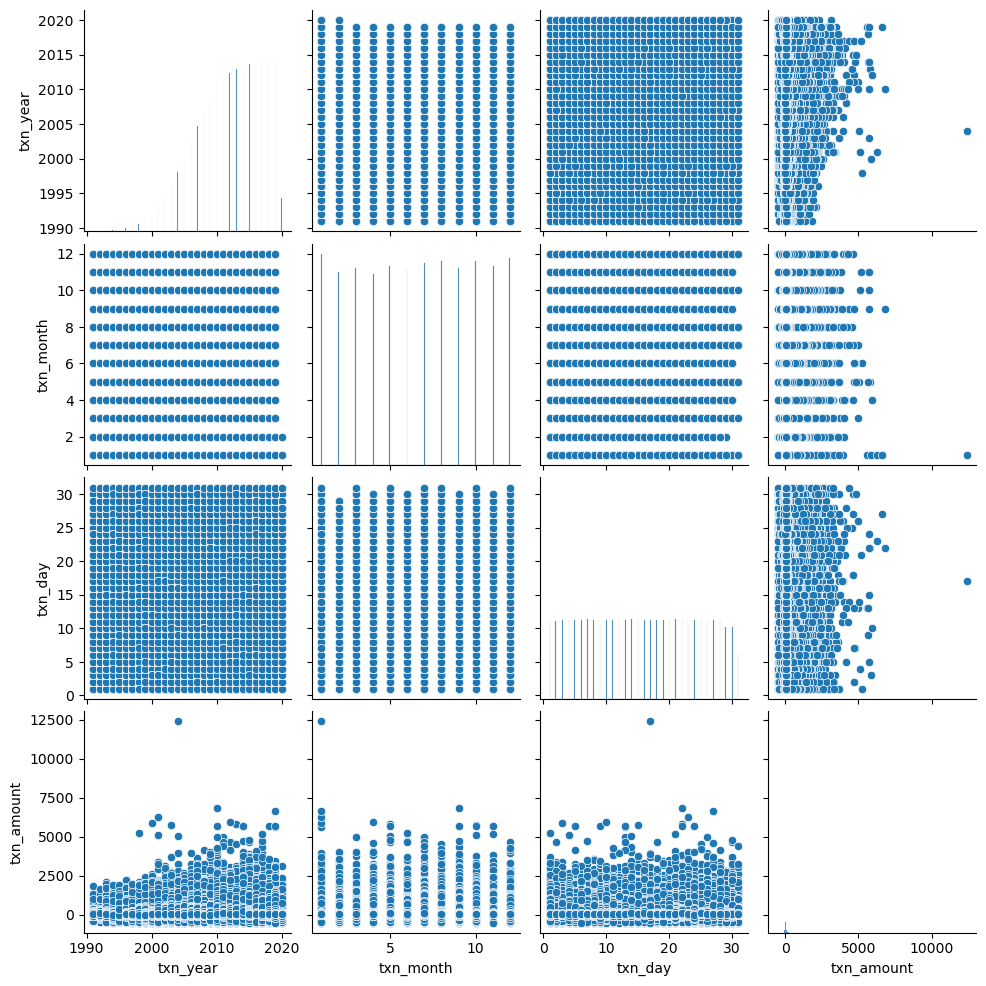

In [16]:
# Create a pair plot 

g = sns.pairplot(df_txn_sub)

g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\txn_pairplot.png')

plt.show()

On the amount to year we see a steady increase in spending from 1990 to 2019. After 2019 we see a slight decrease but since the data ends we can't assume it will be an ongoing trend.

On the amount to month we can see an increase from Jan to May and then we see the spending amount go down towards November with a slight uptick in December. This scatterplot view gives us slightly different insight than the one above which indicated a more steady amount spent monthly with occasional outliers.

On a daily basis the amount spent is somewhat constant with a slight increase around the 15th of the month and towards the end of the month but nothing too noticeable.

#### Categorical Plot

<Axes: xlabel='txn_amount', ylabel='Count'>

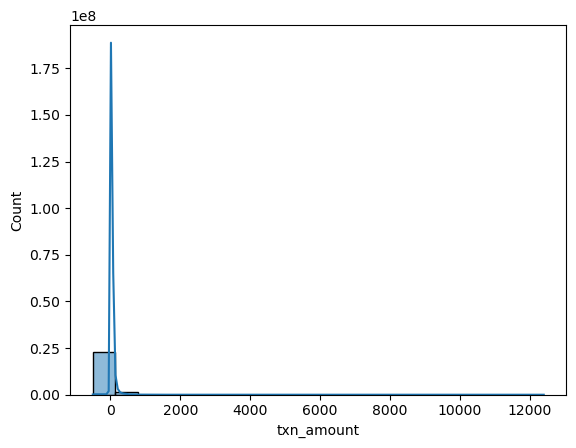

In [16]:
sns.histplot(df_txn['txn_amount'], bins = 20, kde = True)

In [17]:
# Create categories for txn_amount
df_txn.loc[df_txn['txn_amount'] < 50, 'Amount Category'] = 'Low'
df_txn.loc[(df_txn['txn_amount'] >= 50) & (df_txn['txn_amount'] <= 150), 'Amount Category'] = 'Medium'
df_txn.loc[df_txn['txn_amount'] > 150, 'Amount Category'] = 'High'

# Check distribution of categories
print(df_txn['Amount Category'].value_counts(dropna=False))

Amount Category
Low       15979431
Medium     7239141
High       1168261
Name: count, dtype: int64


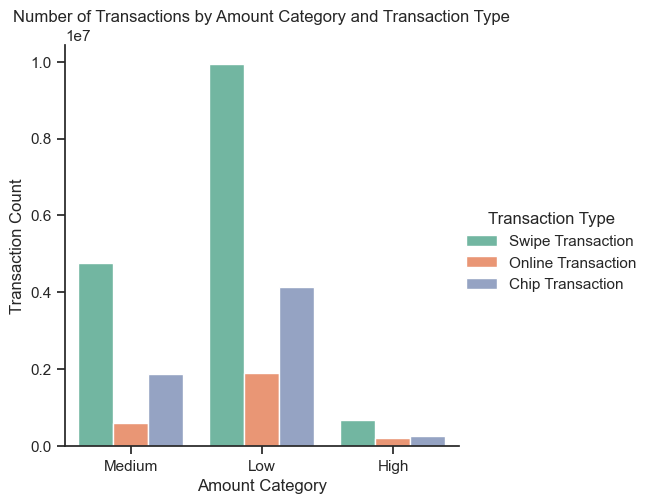

In [18]:
# Create a categorical plot in using the Amount categories created above
sns.set(style="ticks")

g = sns.catplot(
    x="Amount Category",
    kind="count",
    hue="txn_type",       
    data=df_txn,
    palette="Set2"
)

# Set labels and title
g.set_axis_labels("Amount Category", "Transaction Count")
plt.title("Number of Transactions by Amount Category and Transaction Type")

# Add legend 
g._legend.set_title("Transaction Type") 

g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\txn_catplot.png')

plt.show()

In [19]:
# Count proportions of transaction types
percentages = df_txn['txn_type'].value_counts(normalize=True) * 100

print(percentages)


txn_type
Swipe Transaction     63.091542
Chip Transaction      25.751532
Online Transaction    11.156926
Name: proportion, dtype: float64


### Card Data

In [20]:
# Check df_card columns
df_card.columns

Index(['user_id', 'card_index', 'card_brand', 'card_type', 'card_number',
       'expires', 'CVV', 'has_chip', 'cards_issued', 'credit_limit',
       'acct_open_date', 'year_PIN_last_changed', 'card_on_dark_web'],
      dtype='object')

In [21]:
df_card.head()

,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
0,0,0,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,24295.0,2002-09-01,2008,No
1,0,1,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,21968.0,2014-04-01,2014,No
2,0,2,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,46414.0,2003-07-01,2004,No
3,0,3,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,12400.0,2003-01-01,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,075,YES,1,28.0,2008-09-01,2009,No


In [22]:
# Create Card df sub with numerical columns for EVA
df_card_sub = df_card[['credit_limit', 'cards_issued']]

In [23]:
# Check data types
df_card_sub.dtypes

credit_limit    float64
cards_issued      int64
dtype: object

In [24]:
# Check for missing values
df_card_sub.isnull().sum()

credit_limit    0
cards_issued    0
dtype: int64

#### Exploring Numerical Relationships

In [25]:
# Create a correlation matrix using pandas
df_card_sub.corr()

,credit_limit,cards_issued
credit_limit,1.000000,-0.084688
cards_issued,-0.084688,1.000000


There does not seem to be a correlation between credit_limit and cards_issued.

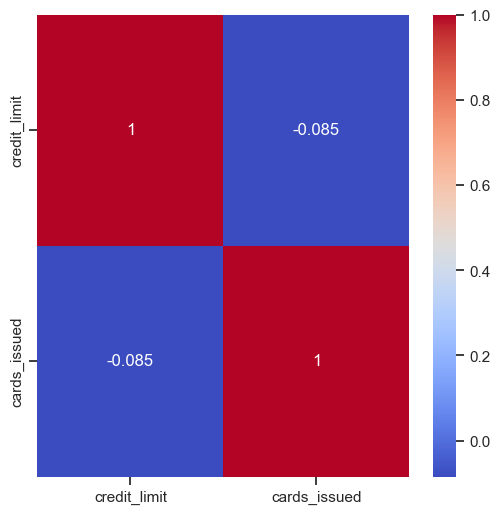

In [26]:
# Create a subplot with matplotlib
f2,ax2 = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_card = sns.heatmap(df_card_sub.corr(), annot = True, cmap = 'coolwarm', ax = ax2)

# Save heatmap
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\card_corr_heatmap.png')

plt.show()

#### Scatter Plot

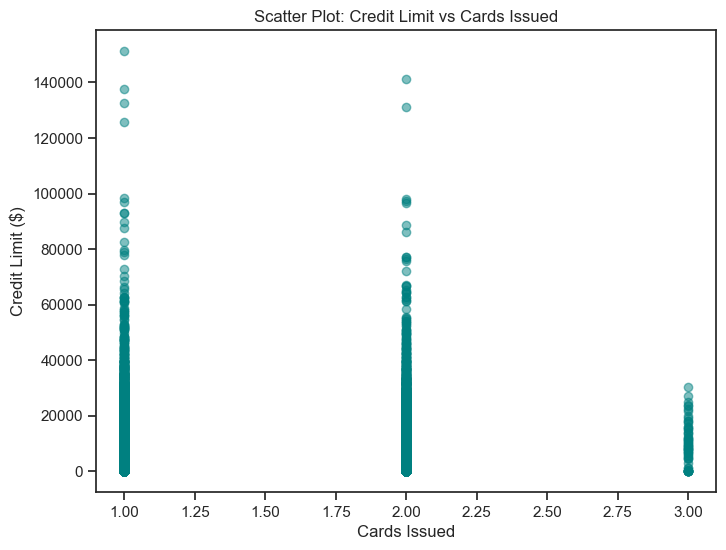

In [27]:
# Scatter plot of Cards Issued vs Credit Limit
plt.figure(figsize=(8,6))
plt.scatter(df_card_sub['cards_issued'], df_card_sub['credit_limit'], alpha=0.5, color='teal')
plt.xlabel('Cards Issued')
plt.ylabel('Credit Limit ($)')
plt.title('Scatter Plot: Credit Limit vs Cards Issued')

# Save the plot in the same folder as your heatmap
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\card_scatter_plot.png')

plt.show()

Most of the multiple cards issued are for cards under 4000 in credit limit.

#### Pair Plot

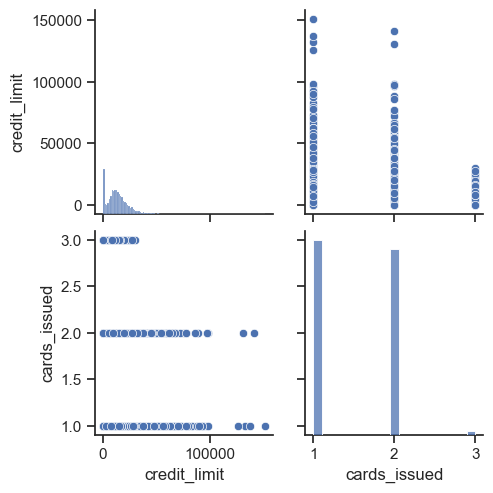

In [28]:
# Create a pair plot 

g = sns.pairplot(df_card_sub)

g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\card_pairplot.png')

plt.show()

#### Categorical Plot

<Axes: xlabel='credit_limit', ylabel='Count'>

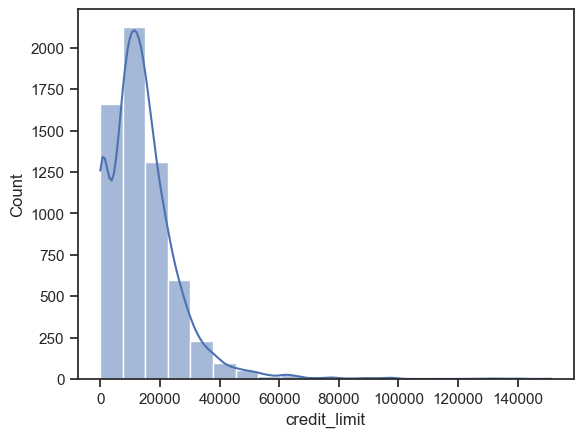

In [29]:
sns.histplot(df_card['credit_limit'], bins = 20, kde = True)

In [30]:
# Create Credit Limit categories
df_card.loc[df_card['credit_limit'] < 10000, 'Credit Limit Category'] = 'Low credit'
df_card.loc[(df_card['credit_limit'] >= 10000) & (df_card['credit_limit'] < 50000), 'Credit Limit Category'] = 'Medium credit'
df_card.loc[df_card['credit_limit'] >= 50000, 'Credit Limit Category'] = 'High credit'
df_card['Credit Limit Category'].value_counts(dropna=False)

Credit Limit Category
Medium credit    3718
Low credit       2336
High credit        92
Name: count, dtype: int64

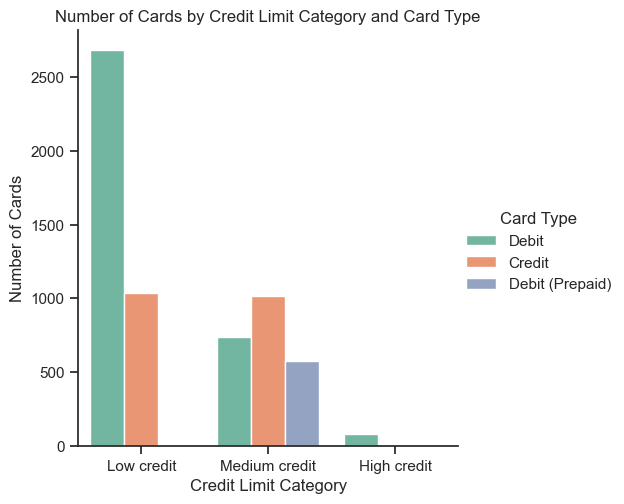

In [31]:
# Set Seaborn style
sns.set(style = 'ticks')

# Create categorical plot
g = sns.catplot(
    x = 'Credit Limit Category',
    kind = 'count',
    hue = 'card_type',       
    data = df_card,
    palette = 'Set2'
)

# Set labels and title
g.set_axis_labels('Credit Limit Category', 'Number of Cards')
plt.title('Number of Cards by Credit Limit Category and Card Type')

# Add legend
g._legend.set_title('Card Type') 

g.set_xticklabels(['Low credit', 'Medium credit', 'High credit'])

# Save the plot to your visualizations folder
g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\credit_limit_catplot.png')

plt.show()


### User Data

In [32]:
# Check df_user columns
df_user.columns

Index(['user_id', 'user_name', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'apartment', 'city', 'state',
       'user_zip_code', 'latitude', 'longitude', 'per_capita_income_zip_code',
       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards'],
      dtype='object')

In [33]:
df_user.head()

,user_id,user_name,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,user_zip_code,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,53797.0,109687.0,183855.0,675,1


In [34]:
# Create user df sub with numerical columns for EVA
df_user_sub = df_user[['current_age', 'retirement_age',  'birth_year', 'birth_month',  'per_capita_income_zip_code', 
                       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards']]

In [35]:
# Check data types
df_user_sub.dtypes

current_age                     int64
retirement_age                  int64
birth_year                      int64
birth_month                     int64
per_capita_income_zip_code    float64
yearly_income_person          float64
total_debt                    float64
FICO_score                      int64
num_credit_cards                int64
dtype: object

In [36]:
# Check for missing values
df_user_sub.isnull().sum()

current_age                   0
retirement_age                0
birth_year                    0
birth_month                   0
per_capita_income_zip_code    0
yearly_income_person          0
total_debt                    0
FICO_score                    0
num_credit_cards              0
dtype: int64

In [37]:
# Find duplicates
df_user_dups = df_user_sub[df_user_sub.duplicated()]

In [38]:
df_user_dups.shape

(0, 9)

#### Exploring Numerical Relationships

In [39]:
# Create a correlation matrix using pandas
df_user_sub.corr()

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
current_age,1.000000,0.004814,-0.999769,0.008117,-0.009054,-0.114316,-0.315443,-0.005468,0.484189
retirement_age,0.004814,1.000000,-0.005548,0.019351,0.004605,0.021506,-0.043371,0.172668,0.158896
birth_year,-0.999769,-0.005548,1.000000,-0.022729,0.008968,0.113853,0.315195,0.006187,-0.484439
birth_month,0.008117,0.019351,-0.022729,1.000000,-0.019579,-0.013205,-0.001946,-0.019810,0.014902
per_capita_income_zip_code,-0.009054,0.004605,0.008968,-0.019579,1.000000,0.963975,0.496138,-0.004545,0.018606
yearly_income_person,-0.114316,0.021506,0.113853,-0.013205,0.963975,1.000000,0.550641,0.000167,-0.032877
total_debt,-0.315443,-0.043371,0.315195,-0.001946,0.496138,0.550641,1.000000,-0.104537,-0.217940
FICO_score,-0.005468,0.172668,0.006187,-0.019810,-0.004545,0.000167,-0.104537,1.000000,0.237935
num_credit_cards,0.484189,0.158896,-0.484439,0.014902,0.018606,-0.032877,-0.217940,0.237935,1.000000


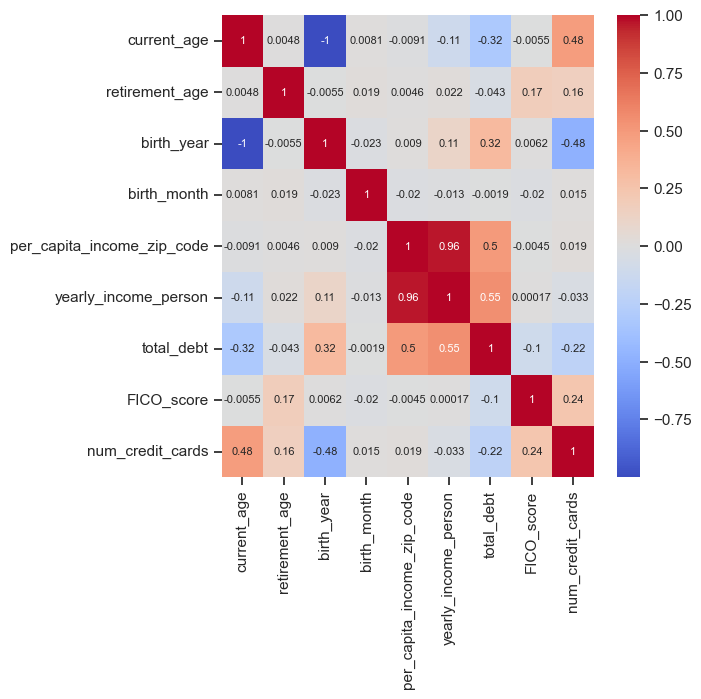

In [40]:
# Create a subplot with matplotlib
f3,ax3 = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_user = sns.heatmap(df_user_sub.corr(), annot = True, cmap = 'coolwarm', ax = ax3, annot_kws = {'size': 8})

# Save heatmap
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\user_corr_heatmap.png')

plt.show()

The heatmap lets us identify the perfect negative correlation between the users birthday and their current age. This obviouly makes sense as the age of a person is derived from their birth year. 

The next very stong correlation is a users income to the per capita income of zip code. What this says is that users tend to earn similarly to the average income of their area.

There is a high correlation between total debt and both per capita income - zipcode and yearly income- person, this makes sense because people with higher personal income can usually take on more debt.

Lastly there is a moderate correlation between FICO score and number of credit cards, an important observation because, credit worthy users are often approved multiple cards.

#### Scatter Plot

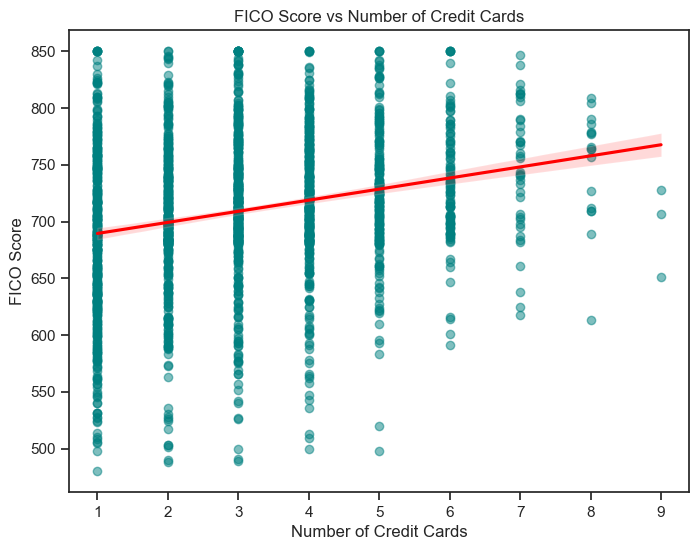

In [41]:
# Set style
sns.set(style = 'ticks')

# Create scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x = 'num_credit_cards', y = 'FICO_score', data = df_user_sub, scatter_kws = {'alpha':0.5, 'color':'teal'}, line_kws = {'color':'red'})

# Labels and title
plt.xlabel('Number of Credit Cards')
plt.ylabel('FICO Score')
plt.title('FICO Score vs Number of Credit Cards')

# Save the plot
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\fico_vs_num_cards.png')

plt.show()


There seems to be a moderate positive trend.

Users with more credit cards generally have slightly higher FICO scores, which makes sense because people with good credit are more likely to be approved for multiple cards.

When we see a higher spread the users with fewer cards (1–3) have a wide range of FICO scores (from ~500 to 850). Some low-FICO users have only 1 card, and some high-FICO users also have just 1–2 cards.

When we see a lower spread the users with 7–9 cards mostly have higher FICO scores, fewer low scores in this group. Suggesting that having many cards is more common among users with good credit.

#### Pair Plot

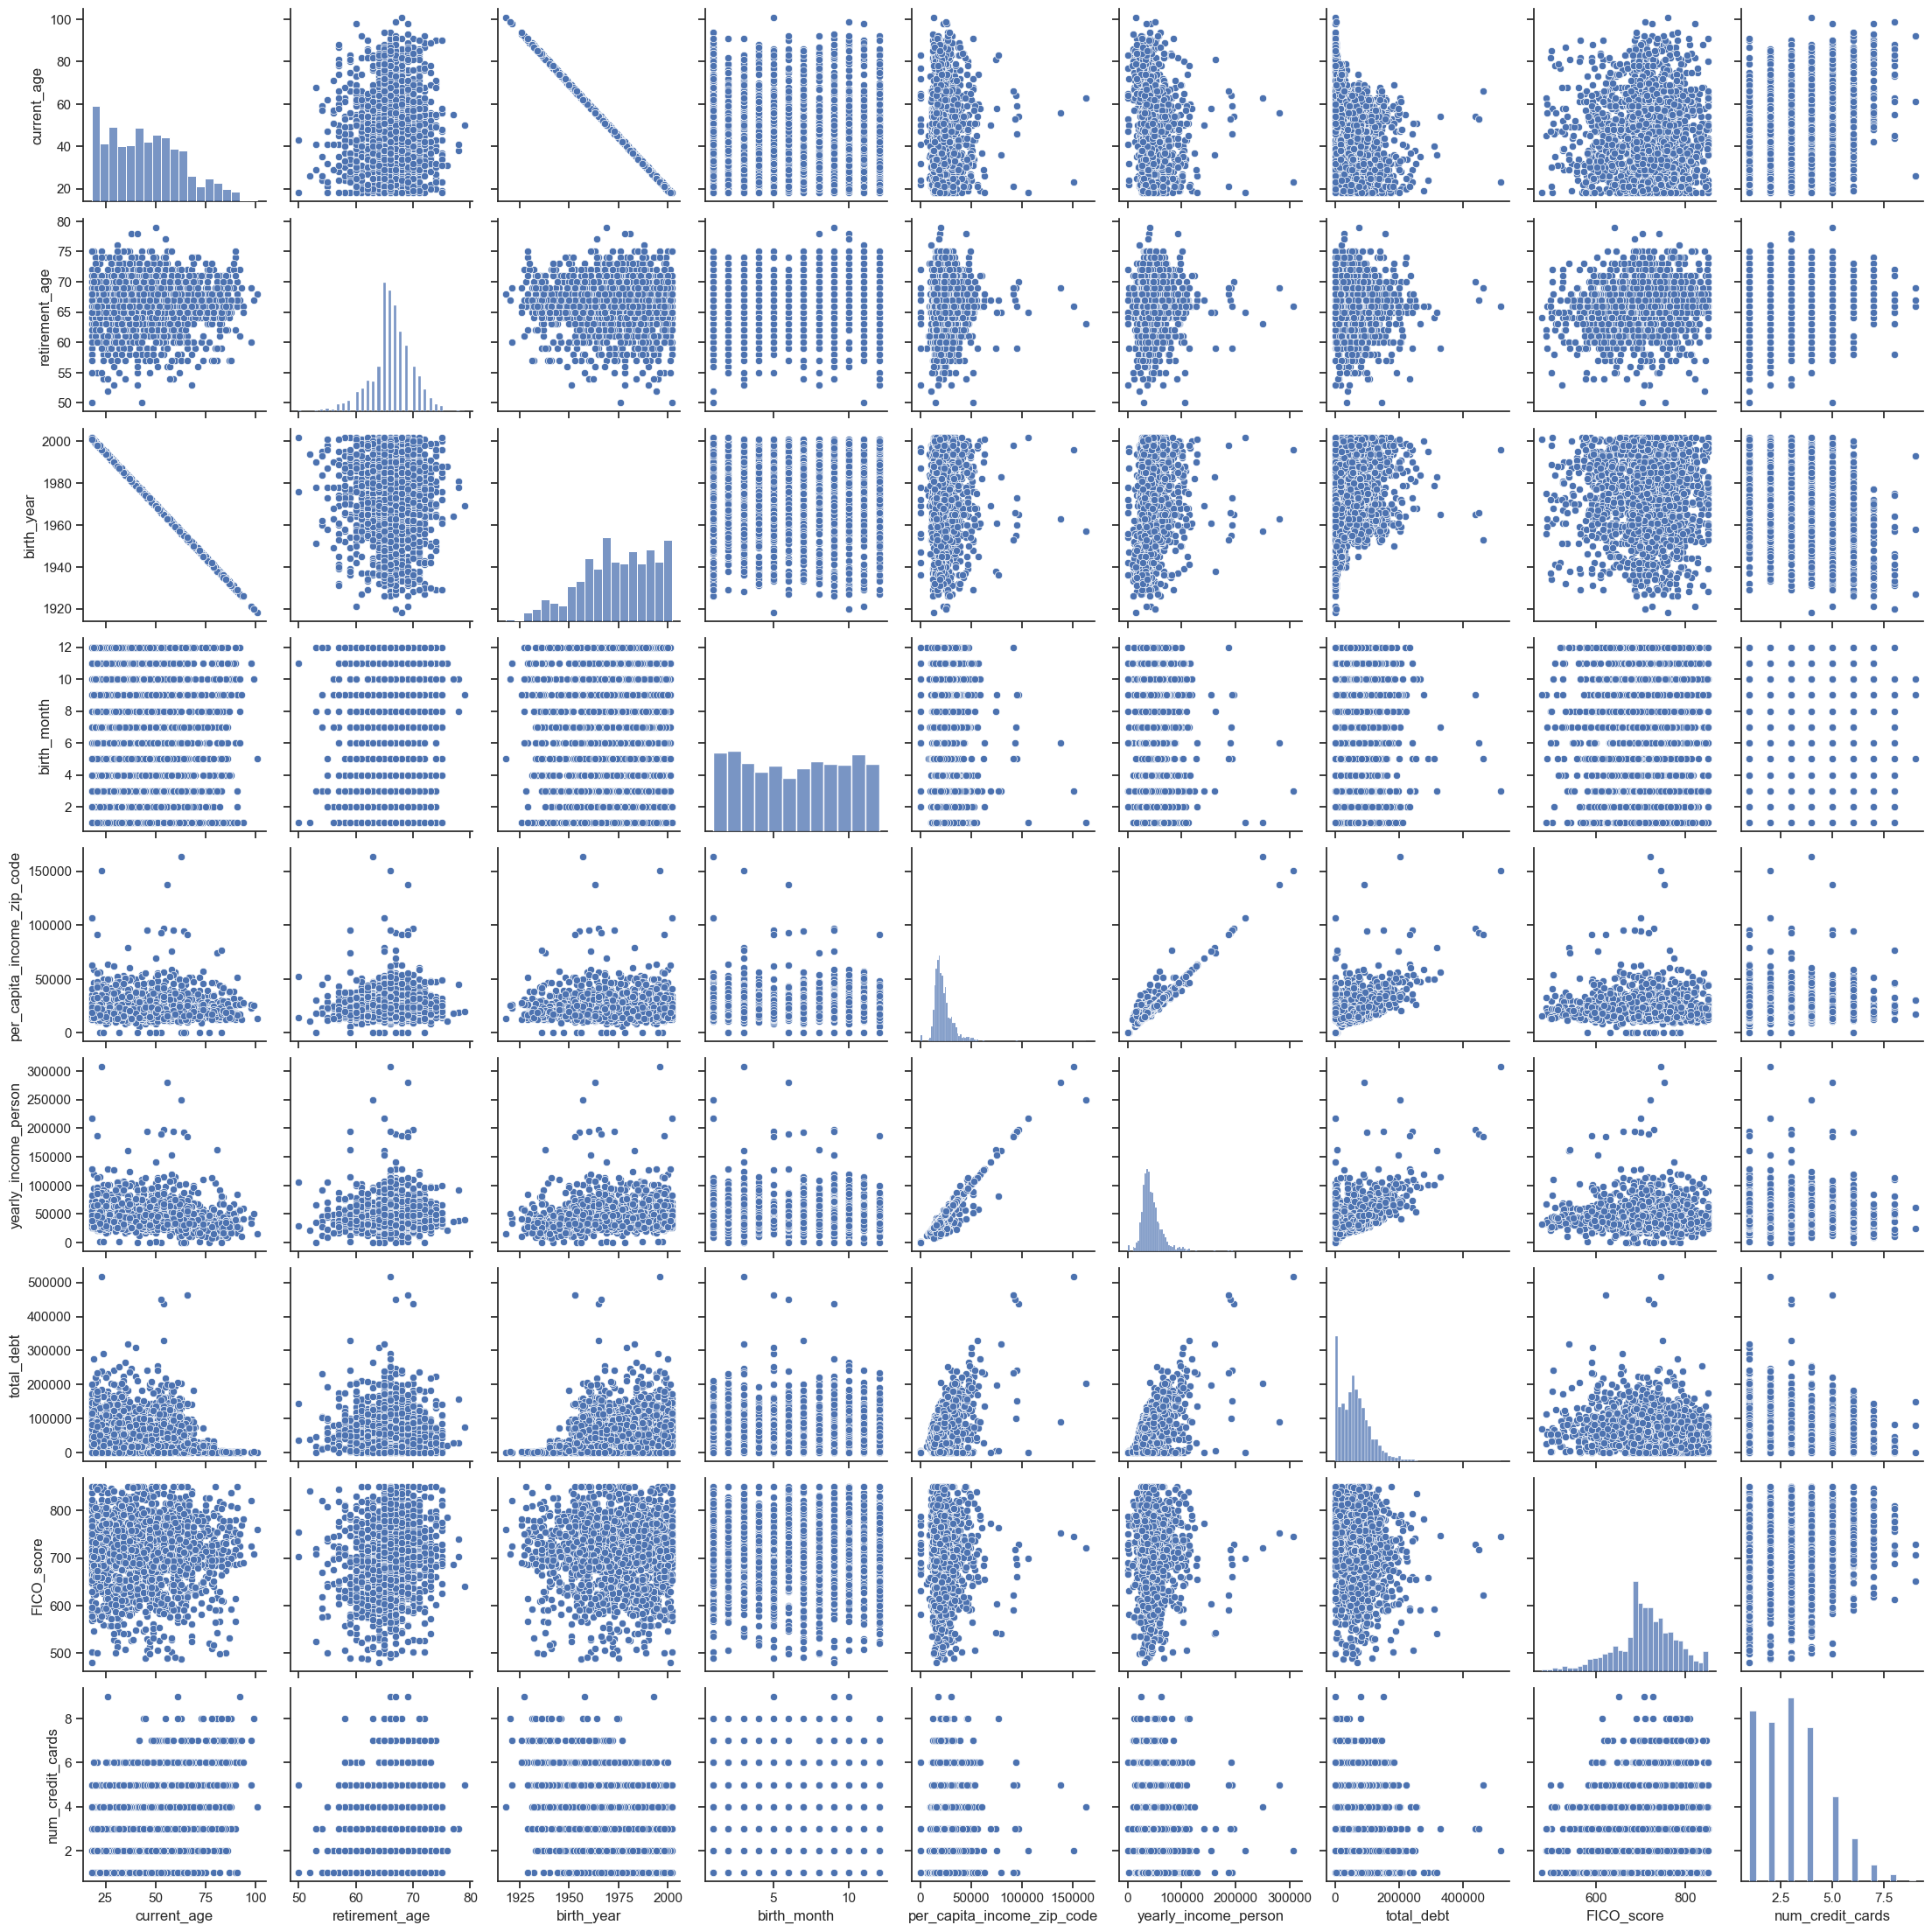

In [43]:
# Create a pair plot 

g = sns.pairplot(df_user_sub)

g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\user_pairplot.png')

plt.show()

I would like to continue to explore total_debt to yearly_income_person, per_capita_income_zip_code, and FICO_score.

Understanding how debt varies with these variables is critical for risk assessment and financial behavior analysis. When compared with FICO score it will help identify patterns in financial stability and repayment capacity. It can also help see geographical trends in debt and creditworthiness.

Also we can compare individual income to income by zip to highlight any socioeconomic disparities.

#### Categorical Plot

<Axes: xlabel='yearly_income_person', ylabel='Count'>

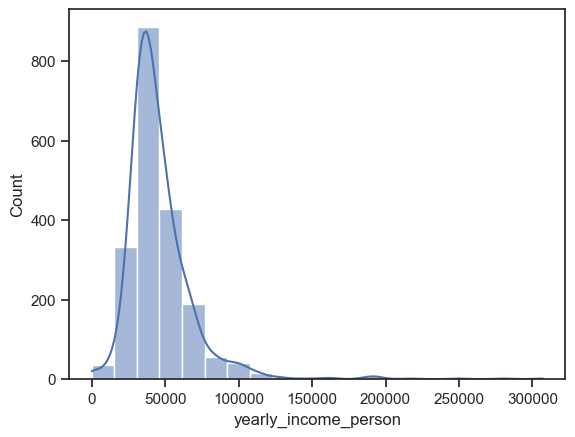

In [42]:
# Use a histogram to visualize the distribution of the variables.
sns.histplot(df_user['yearly_income_person'], bins = 20, kde = True)

In [43]:
# Create income categories
df_user.loc[df_user['yearly_income_person'] < 50000, 'Income_category'] = 'Low income'
df_user.loc[(df_user['yearly_income_person'] >= 50000) & (df_user['yearly_income_person'] < 100000), 'Income_category'] = 'Medium income'
df_user.loc[df_user['yearly_income_person'] >= 100000, 'Income_category'] = 'High income'

In [44]:
# Check distribution
print(df_user['Income_category'].value_counts(dropna=False))


Income_category
Low income       1405
Medium income     543
High income        52
Name: count, dtype: int64


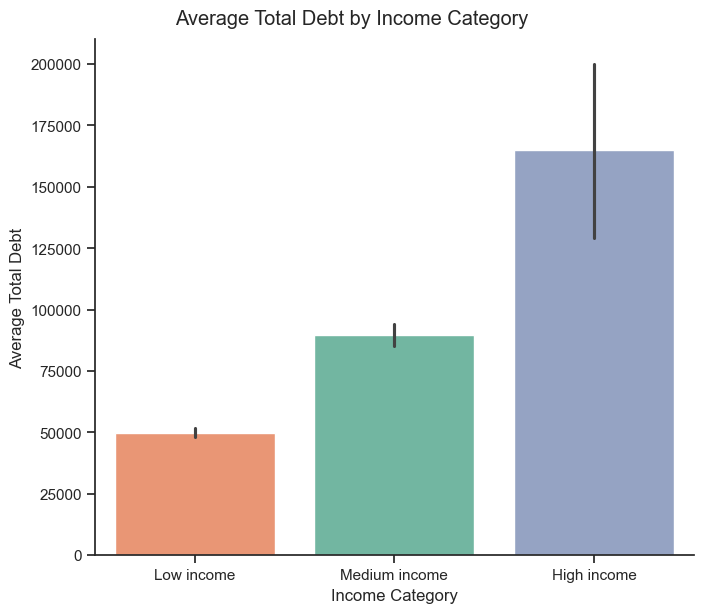

In [45]:
sns.set(style="ticks")

# Define the order explicitly
income_order = ['Low income', 'Medium income', 'High income']

g = sns.catplot(
    x="Income_category",
    y="total_debt",
    hue="Income_category",
    data=df_user,
    kind="bar",
    order=income_order,      # force correct order
    height=6,
    aspect=1.2,
    palette="Set2"
)

g.set_axis_labels("Income Category", "Average Total Debt")
g.fig.suptitle("Average Total Debt by Income Category", y=1.02)

# Save the figure
plt.savefig(
    r"C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\avg_total_debt_by_income.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()

### Combined Data

In [46]:
df_user.columns

Index(['user_id', 'user_name', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'apartment', 'city', 'state',
       'user_zip_code', 'latitude', 'longitude', 'per_capita_income_zip_code',
       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards',
       'Income_category'],
      dtype='object')

In [47]:
df_txn.columns

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_date',
       'txn_time', 'txn_amount', 'txn_flag', 'txn_type', 'merchant_name',
       'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code',
       'MCC', 'errors?', 'is_fraud?', 'Amount Category'],
      dtype='object')

In [48]:
df_card.columns

Index(['user_id', 'card_index', 'card_brand', 'card_type', 'card_number',
       'expires', 'CVV', 'has_chip', 'cards_issued', 'credit_limit',
       'acct_open_date', 'year_PIN_last_changed', 'card_on_dark_web',
       'Credit Limit Category'],
      dtype='object')

In [49]:
# Step 1: merge user and transaction on user_id
df_user_txn = df_txn.merge(
    df_user,
    on='user_id',
    how='left'   # use left join to keep all transactions
)

# Step 2: merge the result with card data on card_index
df_comb = df_user_txn.merge(
    df_card,
    on=['user_id', 'card_index'],
    how='left'   # use left join to keep all transactions
)

# Optional: check the shape and columns
print(df_comb.shape)
print(df_comb.columns.tolist())


(24386833, 50)
['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_date', 'txn_time', 'txn_amount', 'txn_flag', 'txn_type', 'merchant_name', 'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code', 'MCC', 'errors?', 'is_fraud?', 'Amount Category', 'user_name', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'address', 'apartment', 'city', 'state', 'user_zip_code', 'latitude', 'longitude', 'per_capita_income_zip_code', 'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards', 'Income_category', 'card_brand', 'card_type', 'card_number', 'expires', 'CVV', 'has_chip', 'cards_issued', 'credit_limit', 'acct_open_date', 'year_PIN_last_changed', 'card_on_dark_web', 'Credit Limit Category']


In [50]:
# Create user df sub with numerical columns for EVA
df_comb_sub = df_comb[['credit_limit', 'cards_issued',  'txn_year', 'txn_month', 'txn_day', 'txn_amount', 'birth_month',  'per_capita_income_zip_code', 
                       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards']]

In [51]:
# Check data types
df_comb_sub.dtypes

credit_limit                  float64
cards_issued                    int64
txn_year                        int64
txn_month                       int64
txn_day                         int64
txn_amount                    float64
birth_month                     int64
per_capita_income_zip_code    float64
yearly_income_person          float64
total_debt                    float64
FICO_score                      int64
num_credit_cards                int64
dtype: object

In [52]:
# Check for missing values
df_comb_sub.isnull().sum()

credit_limit                  0
cards_issued                  0
txn_year                      0
txn_month                     0
txn_day                       0
txn_amount                    0
birth_month                   0
per_capita_income_zip_code    0
yearly_income_person          0
total_debt                    0
FICO_score                    0
num_credit_cards              0
dtype: int64

In [53]:
# Find duplicates
df_comb_dups = df_user_sub[df_user_sub.duplicated()]

In [54]:
df_comb_dups.shape

(0, 9)

### Exploring Numerical Relationships

In [55]:
# Create a correlation matrix using pandas
df_comb_sub.corr()

,credit_limit,cards_issued,txn_year,txn_month,txn_day,txn_amount,birth_month,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
credit_limit,1.000000,-0.066143,0.011654,0.000068,0.000071,0.073417,-0.001901,0.592295,0.561430,0.255630,0.036784,0.080012
cards_issued,-0.066143,1.000000,-0.015127,0.000087,0.000116,0.003349,0.001979,-0.003147,-0.003037,0.020488,-0.056954,-0.068816
txn_year,0.011654,-0.015127,1.000000,-0.055990,-0.001486,-0.011629,-0.015280,-0.004351,0.003588,0.046498,-0.017269,-0.097776
txn_month,0.000068,0.000087,-0.055990,1.000000,0.013521,-0.000628,-0.000080,-0.000283,-0.000595,-0.001610,-0.000730,0.002403
txn_day,0.000071,0.000116,-0.001486,0.013521,1.000000,-0.000568,0.000134,0.000196,0.000131,0.000107,0.000094,0.000401
txn_amount,0.073417,0.003349,-0.011629,-0.000628,-0.000568,1.000000,-0.009940,0.104735,0.102528,0.047501,-0.008134,-0.004321
birth_month,-0.001901,0.001979,-0.015280,-0.000080,0.000134,-0.009940,1.000000,-0.013913,0.000841,0.000389,-0.051410,-0.011856
per_capita_income_zip_code,0.592295,-0.003147,-0.004351,-0.000283,0.000196,0.104735,-0.013913,1.000000,0.951010,0.432235,-0.052394,0.010848
yearly_income_person,0.561430,-0.003037,0.003588,-0.000595,0.000131,0.102528,0.000841,0.951010,1.000000,0.499132,-0.051561,-0.042858
total_debt,0.255630,0.020488,0.046498,-0.001610,0.000107,0.047501,0.000389,0.432235,0.499132,1.000000,-0.123507,-0.227573


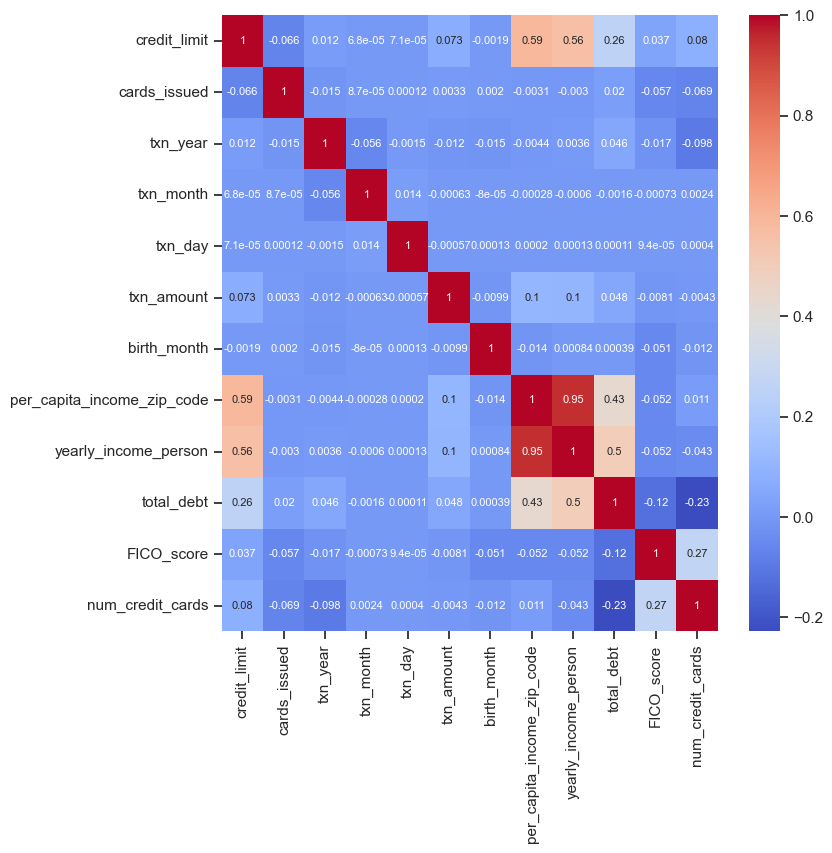

In [56]:
# Create a subplot with matplotlib
f4,ax4 = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_comb = sns.heatmap(df_comb_sub.corr(), annot = True, cmap = 'coolwarm', ax = ax4, annot_kws = {'size': 8})

# Save heatmap
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\comb_corr_heatmap.png')

plt.show()

The analysis shows that credit limit has a moderate positive correlation with both yearly income and per capita income, suggesting that individuals with higher incomes tend to receive higher credit limits. Also, there is only a low correlation between credit limit and total debt, indicating that the amount of debt a person carries does only slightly influences the credit limit assigned to them.

Transaction amount shows only a low correlation with income, which is somewhat unexpected since higher-income individuals might be assumed to spend more. A possible explanation is that income may influence the value of individual transactions rather than the frequency of transactions, meaning total spending behavior is not fully captured by transaction count alone.

Total debt also shows a moderate positive correlation with income, suggesting that individuals with higher incomes are able to borrow more. This likely reflects the assumption by lenders that higher-income individuals have greater repayment capacity.

The number of credit cards shows only a low correlation with both total debt and FICO score. One possible explanation is that individuals with stronger credit profiles are often approved for more cards and may use them actively, but this does not necessarily translate into proportionally higher debt. Instead, their ability to manage multiple accounts responsibly may contribute to maintaining a good FICO score while still having access to more credit.

### Scatter Plot

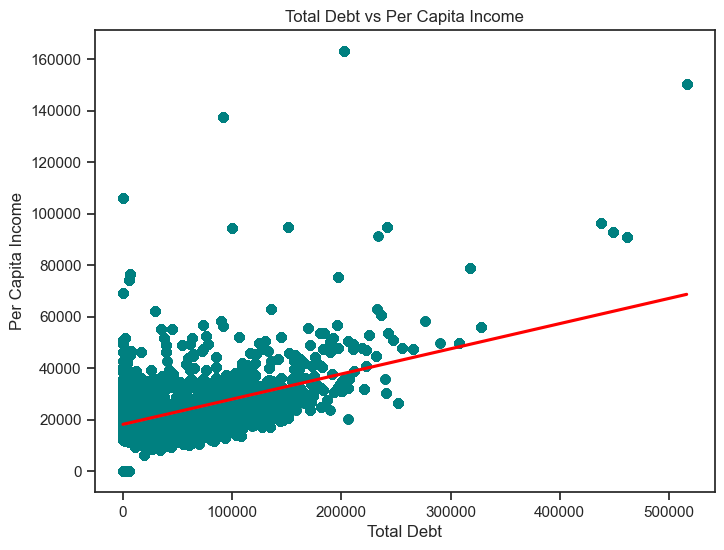

In [57]:
# Set style
sns.set(style = 'ticks')

# Create scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x = 'total_debt', y = 'per_capita_income_zip_code', data = df_comb_sub, scatter_kws = {'alpha':0.5, 'color':'teal'}, line_kws = {'color':'red'})

# Labels and title
plt.xlabel('Total Debt')
plt.ylabel('Per Capita Income')
plt.title('Total Debt vs Per Capita Income')

# Save the plot
plt.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\total_debt_vs_income_per_capita.png')

plt.show()

### Pair Plot

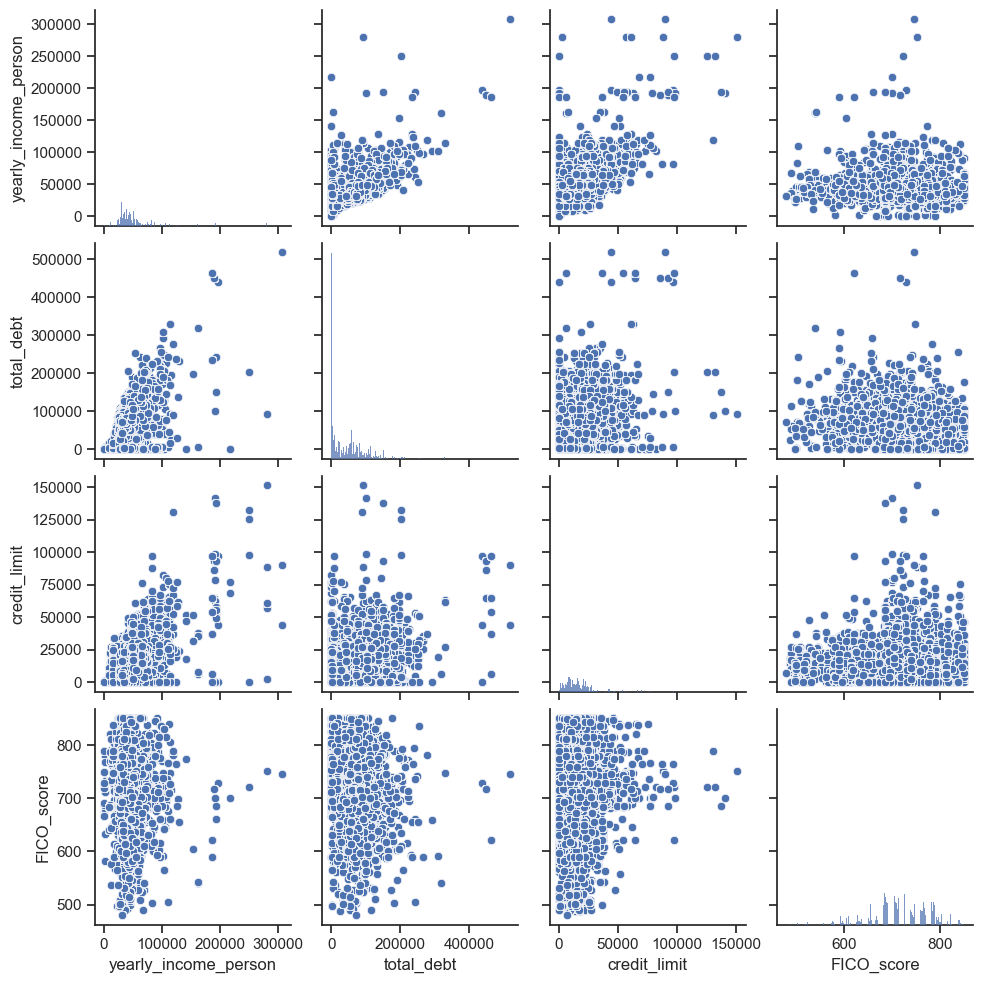

In [58]:
# Create a pair plot with only the columns you want to include
cols_to_plot = [
    'yearly_income_person',
    'total_debt',
    'credit_limit',
    'FICO_score'
]

# Create the pair plot on just those columns
g = sns.pairplot(df_comb_sub[cols_to_plot])

# Save and show
g.savefig(r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\comb_pairplot.png')
plt.show()


### Categorical Plot

In [59]:
# Create age groups using .loc
df_comb.loc[df_comb['current_age'] < 30, 'Age Group'] = 'Young Adult'
df_comb.loc[(df_comb['current_age'] >= 30) & (df_comb['current_age'] < 65), 'Age Group'] = 'Adult'
df_comb.loc[df_comb['current_age'] >= 65, 'Age Group'] = 'Senior'

In [60]:
# Check distribution
print(df_comb['Age Group'].value_counts())



Age Group
Adult          18054113
Senior          5605026
Young Adult      727694
Name: count, dtype: int64


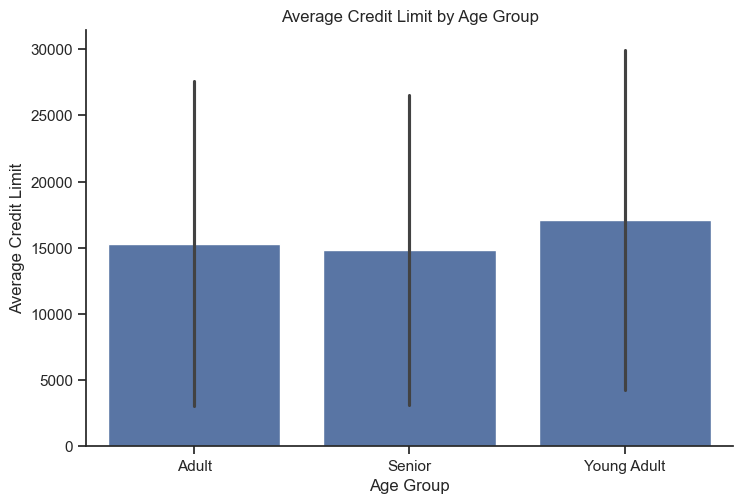

In [61]:
# Create bar plot of credit limit by age group
g = sns.catplot(
    x="Age Group",
    y="credit_limit",
    kind="bar",
    data=df_comb,
    height=5,
    aspect=1.5,
    errorbar="sd"   # show variability
)

plt.title("Average Credit Limit by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Credit Limit")

# Save figure
g.savefig(r"C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\credit_limit_by_age_group.png")

plt.show()


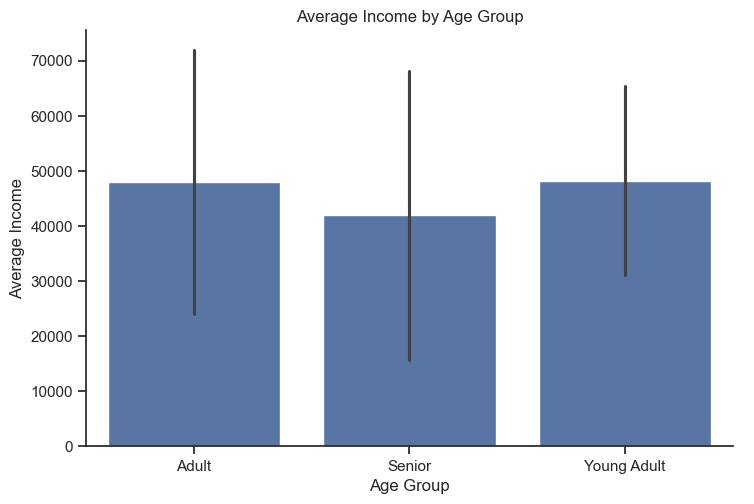

In [62]:
# Create bar plot of credit limit by age group
g = sns.catplot(
    x="Age Group",
    y="yearly_income_person",
    kind="bar",
    data=df_comb,
    height=5,
    aspect=1.5,
    errorbar="sd"   # show variability
)

plt.title("Average Income by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Income")

# Save figure
g.savefig(r"C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis\04_Analysis\Visualizations\average_income_by_age_group.png")

plt.show()

### Extra

In [63]:
# Define the bins (upper limits of each bracket)
bins = [0, 11925, 48475, 103350, 197300, 250525, float("inf")]

# Define labels for the bins
labels = [
    "10% ($0–11,925)",
    "12% ($11,925–48,475)",
    "22% ($48,475–103,350)",
    "24% ($103,350–197,300)",
    "32% ($197,300–250,525)",
    "35% ($250,525+)"]

# Create a new column for income bracket
df_comb["Income Bracket"] = pd.cut(
    df_comb["yearly_income_person"], 
    bins = bins, 
    labels = labels,
    right = True,  
    include_lowest = True)

# Compare average spending across income brackets
spending_by_bracket = df_comb.groupby("Income Bracket", observed = False)["txn_amount"].mean()

print(spending_by_bracket)

Income Bracket
10% ($0–11,925)            24.281614
12% ($11,925–48,475)       37.752346
22% ($48,475–103,350)      53.708963
24% ($103,350–197,300)     68.027918
32% ($197,300–250,525)    116.192943
35% ($250,525+)            83.449032
Name: txn_amount, dtype: float64


# 04. Defining Questions for Analysis Exploration

### Spending Behavior Questions

In [67]:
# Which merchant category (MCC) has the highest total spend?
	
# How does spending varies across categories by month? Year?
# There is slight variations by month but for the most part it is not significant.	

# What portions of transactions are in person vs. online?
# 89% of transactions are in person while only 11% of transactions are online.

# Which states show the highest spending activities? Which countries?
	
# How does spending differ across income brackets and credit score ranges? 
# As the income increases so does the average amount spent across purchases with an outlier being the second to last income bracket that actually spend more per transaction than the highest income bracket.

# What is the avg. transaction size, and how consistent is it across time?


### Card Usage Questions

In [68]:
# What portion of transactions are chip, swipe, or online?
# Most transactions are in person more specifically swipe transactions, then chip transactions. Online transactions are lowest.

# Does the avg. transaction amount differ by transaction method?
	
# Which card brands are used most frequently?
	
# Do spending amounts vary across brands?
	
# What is the average credit utilization rate (balance/credit limit) across users?
	
# How many cards does the average customer hold?
	
# Do customers with multiple cards distribute their spending across them?
	

### User Risk Profiling Questions

In [69]:
# Do high utilization users also have lower credit scores?

# Are certain users engaging in unusually high number of small transactions?

### Fraud Detection Questions

In [70]:
# What percentage of transactions are labeled as fraudulent vs legitimate? error?
	
# Are fraudulent transactions more likely to be online or in person?
	
# Do fraud cases cluster by geography or are randomly distributed?
	
# Does transaction type correlate with fraud likelihood?


# 05. Defining a Hypothesis

In [71]:
# H1: Individuals in higher income brackets spend more per transaction than those in lower income brackets.

# H2: Individuals with higher yearly income will have higher total debt compared to individuals with lower yearly income.

# H3: Higher FICO scores are associated with lower total debt.

# H4: Idividuals with more credit cards tend to have higher total debt compraed to those with fewer cards.

# 06. Export 

In [73]:
df_comb.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_combined_transactions.pkl'))